In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
no2_data = pd.read_csv("no2_data.csv")

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_57356/1644217533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  butte["Date"]=pd.to_datetime(butte["Date"])
/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_57356/1644217533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc["Date"]=pd.to_datetime(sc["Date"])


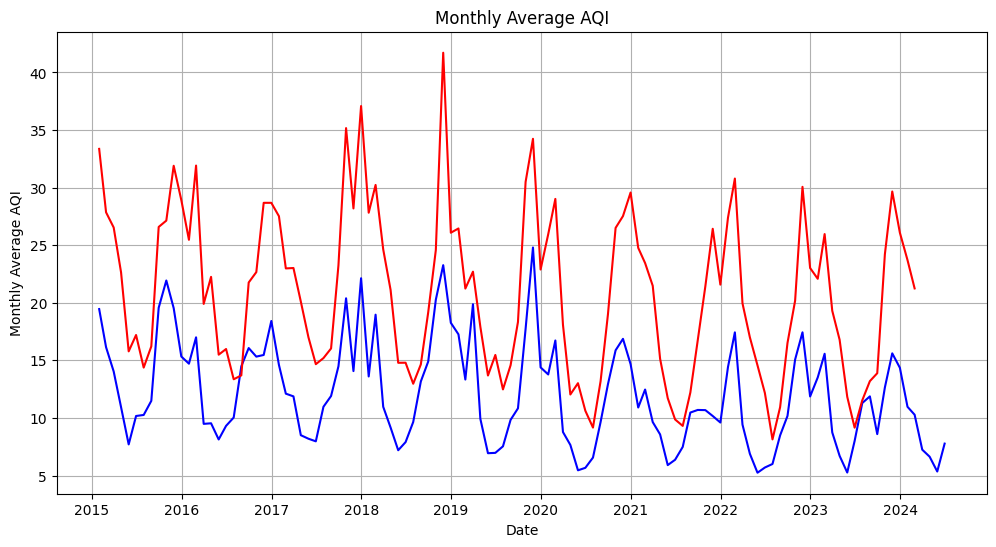

In [4]:
butte = no2_data[no2_data["County"] == "Butte"]
sc = no2_data[no2_data["County"] == "Santa Clara"]

butte["Date"]=pd.to_datetime(butte["Date"])
sc["Date"]=pd.to_datetime(sc["Date"])

butte.set_index('Date', inplace=True)
sc.set_index('Date', inplace=True)

# Calculate the monthly average of 'Daily AQI Value'
monthly_avg_butte = butte.resample('ME')['Daily AQI Value'].mean().reset_index()
monthly_avg_sc = sc.resample('ME')['Daily AQI Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_butte['Date'], monthly_avg_butte['Daily AQI Value'], color="blue")
plt.plot(monthly_avg_sc['Date'], monthly_avg_sc['Daily AQI Value'], color="red")
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.title('Monthly Average AQI')
plt.grid(True)
plt.show()

In [ ]:
full_df = pd.read_csv("full_df.csv")

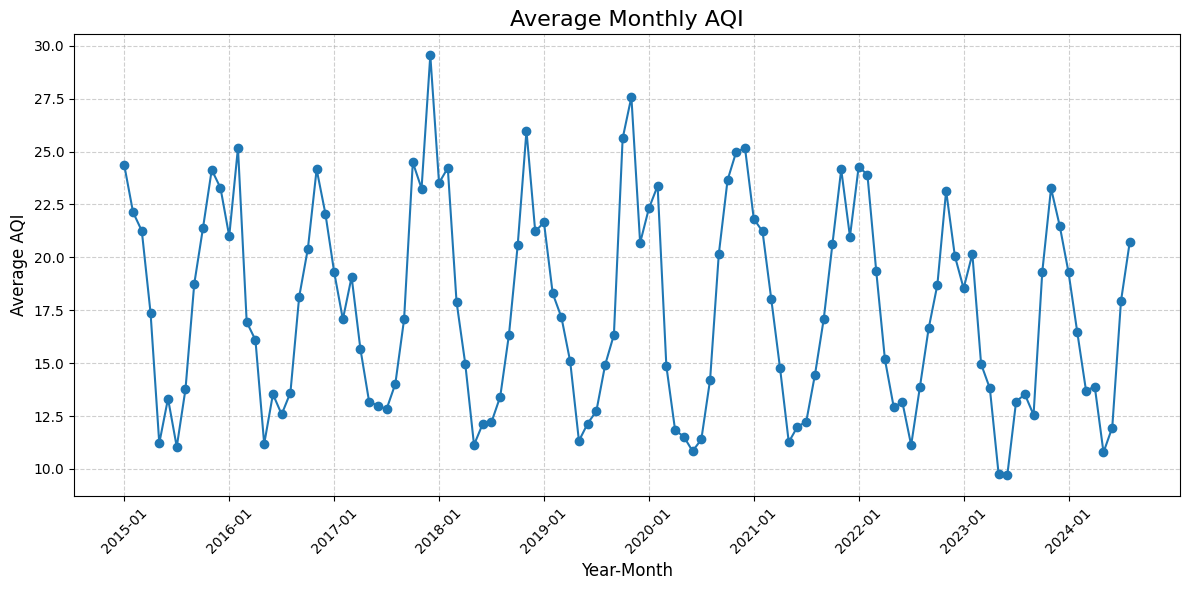

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the Date column to datetime
no2_data['Date'] = pd.to_datetime(no2_data['Date'], format='%m/%d/%Y')

# Extract year and month from the Date column
no2_data['YearMonth'] = no2_data['Date'].dt.to_period('M')

# Calculate the average AQI for each month
monthly_avg_aqi = no2_data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()

# Plot the average monthly AQI
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_aqi['YearMonth'].astype(str), monthly_avg_aqi['Daily AQI Value'], marker='o', linestyle='-')
plt.title('Average Monthly AQI', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)

# Adjust x-axis ticks to show fewer labels
x_labels = monthly_avg_aqi['YearMonth'].astype(str)
step = 12  # Change this to adjust the interval (e.g., every 6 months or 12 months)
plt.xticks(range(0, len(x_labels), step), x_labels[::step], rotation=45, fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

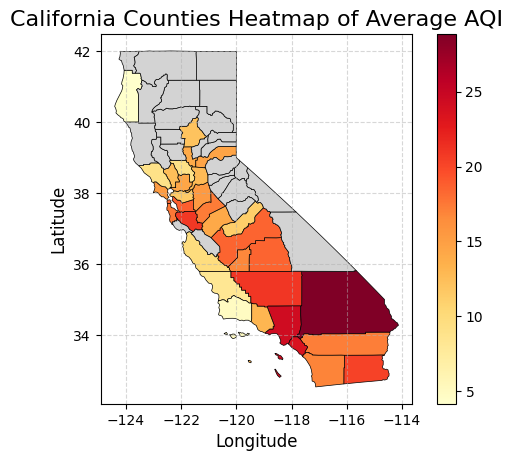

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Load the AQI dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Filter for California
california_data = data[data['State'] == 'California']

# Create a GeoDataFrame for AQI data using latitude and longitude
aqi_points = gpd.GeoDataFrame(
    california_data,
    geometry=gpd.points_from_xy(california_data['Site Longitude'], california_data['Site Latitude']),
    crs='EPSG:4326'  # WGS 84
)

# Perform a spatial join to match AQI points with counties (use 'predicate' instead of 'op')
joined_data = gpd.sjoin(aqi_points, california_geojson, how='inner', predicate='within')

# Group by county and calculate the average AQI
county_aqi = joined_data.groupby('NAME')['Daily AQI Value'].mean().reset_index()
county_aqi.columns = ['NAME', 'Average AQI']

# Merge GeoJSON with AQI data
merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')

# Plot the heatmap with a sequential colormap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average AQI',
    cmap='YlOrRd',  # Yellow to Red sequential colormap
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average AQI', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# new stuff